Import the ODP Python SDK

In [3]:
from odp_sdk import ODPClient


Connect to ODP 

In [4]:
import getpass
client = ODPClient(api_key=getpass.getpass(prompt='Insert your personal ODP API key:'),
                       project="odp", client_name="odp")

Insert your personal ODP API key:········


Get dataframe of casts within search criterias

In [5]:
df=client.casts(longitude=[-10,35],
                latitude=[50,80],
                timespan=['2018-05-01','2018-09-30'],
                n_threads=25) 

Locating available casts..
- 3751 casts found
Data retrieval completed in 32.05s


Explore data statistics

In [6]:
# General statistics
df[['z','Temperature','Oxygen','Salinity']].describe()

,z,Temperature,Oxygen,Salinity
count,751770.000000,751646.000000,178341.000000,751291.000000
mean,516.145372,5.322140,255.885385,32.452949
std,670.819899,5.668237,59.980353,6.604974
min,0.000000,-9.000000,0.000000,0.480000
25%,47.552036,-0.112000,243.993942,34.789600
50%,220.678162,5.010000,271.443268,34.914600
75%,742.858276,7.500000,291.049896,35.034901
max,3755.396973,25.493999,565.107422,35.518002


In [7]:
# Correlations
df[['z','Temperature','Oxygen','Salinity']].corr()

,z,Temperature,Oxygen,Salinity
z,1.000000,-0.634745,0.303897,0.275774
Temperature,-0.634745,1.000000,-0.297590,-0.458356
Oxygen,0.303897,-0.297590,1.000000,0.152295
Salinity,0.275774,-0.458356,0.152295,1.000000


Plot casts

In [8]:
# Import some utility functions
import CastFunctions as c_func
import numpy as np
import cmocean

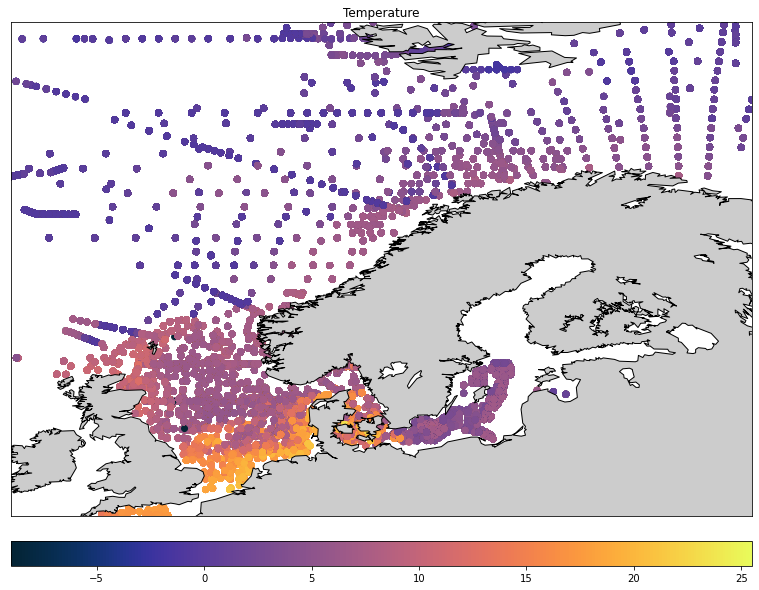

In [12]:
# Plot raw casts
c_func.plot_casts('Temperature',df,cmap=cmocean.cm.thermal)


Create temperature grid at a specific date

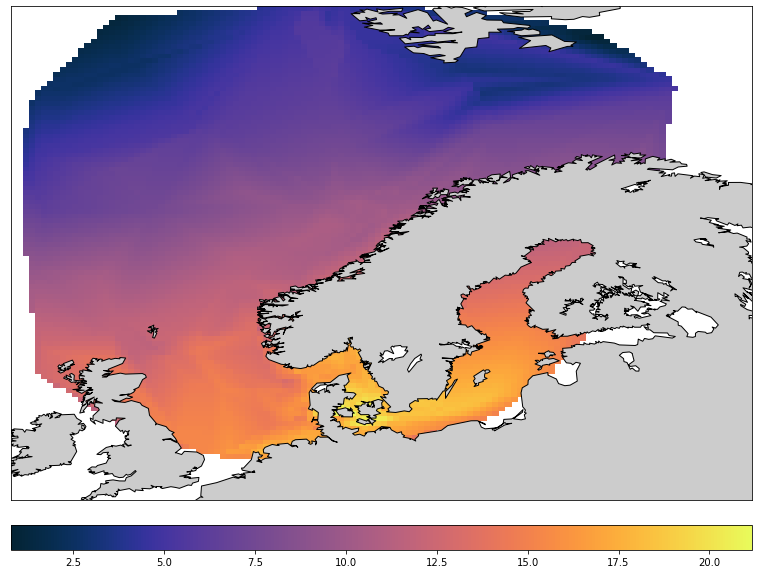

In [13]:

# Create grid
int_lon, int_lat,t= np.meshgrid(np.linspace(-10,35,40*3+1),np.linspace(50,80,35*3+1),0)

# Interpolate points to given grid and date
g=c_func.interpolate_casts(df[df.z<5],'Temperature',int_lon,int_lat,'2018-07-01',days_buffer=90)

# Plot grid
c_func.plot_grid(int_lon, int_lat, g,cmap=cmocean.cm.thermal)                                